# Machine Learning  - Logistic Regression

This notebook covers a Python-based solution for the second programming exercise of the machine learning class on Coursera. Please refer to the exercise text for detailed descriptions and equations.

In this exercise we'll implement simple logisitic regression using gradient descent and apply it to an example problem. We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

## Before we start...

### Output

Logistic Regression is a type of classification algorithm, and therefor requires y to be a discrete value. Mathmatically, we can say:

$$ y ∈ \{0, 1\} $$

### Hypothesis Representation

Our hypothesis basically gives us the probability that y = 1.

We want:

$$ 0 \leq h_\theta (x) \geq 1$$

Where our prediction (hypothesis) is between 0 and 1.

Hypothesis:

$$ h_\theta (x) = g(\theta ^T (x))$$

Where g(z) (also known as sigmoid or logistic function) is:

$$ g(z) = \frac {1} {1+e^{-z}} $$

Combining these, we get:

$$  h_\theta (x) = \frac {1} {1+e^{\theta ^T (x)}} $$

Visuallyin, the sigmoid function looks like this:

![sigmoid function](img/sigmoid_function.png)

**Note** that the sigmoid function asymptotes at 0 and 1.

### Interpretation of Hypothesis Output

Let's establish how we are going to interpret the results of our hypothesis function:

$ h_\theta (x) = $ estimated probability that y = 1 on input x.

Suppose our hypothesis outputs a value of 0.9. We interpret this as a 90% chance that y = 1.

Formally written, we can say that

$$ h_\theta (x) = P(y=1 | x ; \theta)  $$

### Decision Boundary

The decision boundary is the line that separates the area where y = 0 and where y = 1. It is created by our hypothesis function.

In order to get a discrete value between 0 and 1, we need to translate the hypothesis function's output:

$$ h_\theta (x) \leq 0.5 \rightarrow y = 1 $$

$$ h_\theta (x) > 0.5 \rightarrow y = 0 $$

In other words, if $ h_\theta (x) \leq 0.5 $ then we predict y = 1. If $ h_\theta (x) > 0.5 $ we predict that y = 0. Let's revisualize the sigmoid function with this in mind:

![sigmoid function](img/sigmoid_prediction.png)

We can see from this graph that whenever z is greater than 0, our prediction will be one. As we showed above, $ z = \theta ^T (x) $. Therefor, whenever $ \theta ^T (x) > 0 $, our prediction for y is 1, and when $ h_\theta ^T (x) \leq 0 $ we predict that  y = 0.

### Cost Function

if y = 1, then the cost function is:

$$ 
\begin{equation}
  Cost( h_\theta (x), y )=\begin{cases}
    -log( h_\theta (x)), & \text{if $y = 0$}.\\
    -log(1- h_\theta (x)), & \text{if $y = 1$}.
  \end{cases}
\end{equation}
 $$
 
This cost function has some useful properties. For starters, the Cost $ = 0 $ if $ y = 1 $ and $ h_\theta (x)= 1 $. However, as the hypothesis approaches 0 ie ($ h_\theta (x) \rightarrow 0 $), the Cost approaches infinity (Cost $ \rightarrow \infty $).

In other words, if our guess is correct, our cost is 0 because we have no mistake or cost to adjust for. If we make a wrong prediction, we penalize the algorithm by a large amount. Plotted out, the cost function looks like this:

![sigmoid function](img/cost_function_y_1.png)

If y = 0, then we just mirror the cost function:


$$ 
\begin{equation}
  Cost( h_\theta (x), y )=\begin{cases}
    -log( h_\theta (x)), & \text{if $y = 1$}.\\
    -log(1- h_\theta (x)), & \text{if $y = 0$}.
  \end{cases}
\end{equation}
 $$
 
Which plotted out, the cost function of y = 0 looks like this:

![sigmoid function](img/cost_function_y_0.png)





### 0.0 Imports and Setup

In [18]:
# Loads watermark extension and prints details about current platform
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas,matplotlib
%load_ext autoreload
%autoreload 2
 
# import packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# import functions
import utils

# Get project directory
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)
import sys

# make sure matplotlib will display inline
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Sat Nov 24 2018 

CPython 3.6.2
IPython 6.1.0

numpy 1.13.1
scipy 0.19.1
sklearn 0.19.0
pandas 0.20.3
matplotlib 2.0.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)
system     : Darwin
release    : 17.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/sebp/LocalDocuments2/Learning/Classes/ML-Stanford


In [19]:
ex2data1 = os.path.join(PROJ_ROOT, 'hw2', 'ex2', 'ex2data1.txt')
data = pd.read_csv(ex2data1, header=None, names=['exam1_score', 'exam2_score', 'admitted'])
print (ex2data1)
print ('Number of examples (m):', len(data))
data.head()

/Users/sebp/LocalDocuments2/Learning/Classes/ML-Stanford/hw2/ex2/ex2data1.txt
Number of examples (m): 100


,exam1_score,exam2_score,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [20]:
data.describe()

,exam1_score,exam2_score,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## 1 - Logisitic Regression

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. We display the data on a 2-dimensional plot.

Let's plot the data out to see what we have.

(20, 104.30868375490915)

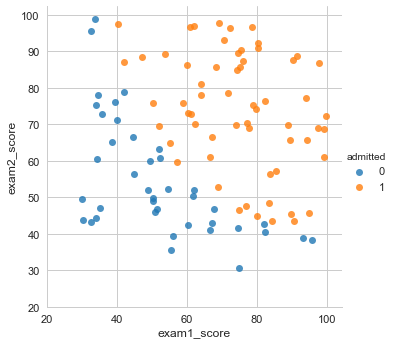

In [21]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style('whitegrid')

sns.lmplot(x='exam1_score', y='exam2_score', data=data,
           fit_reg=False, # No regression line
           hue='admitted')   # Color by evolution stage
plt.ylim(20, None)
plt.xlim(20, None)

### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$


The first step is to implement this function sigmoid so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x) in a new cell. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))
    return g

The following cell evaluates the sigmoid function at z=0. You should get a value of 0.5. You can also try different values for z to experiment with the sigmoid function.

In [6]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


#### 1.2.2 Cost function and gradient
Now we will implement the cost function and gradient for logistic regression. Before proceeding, we are changing our dataframe to numpy arrays, and adding the intercept term to X.

In [7]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1]

# X, y = data[:, 0:2], data[:, 2]
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print (cols)
print (X.shape, y.shape)

3
(100, 3) (100,)


Now, complete the code for the function costFunction to return the cost and gradient. Recall that the conditional cost function in logistic regression is

$$ 
\begin{equation}
  Cost( h_\theta (x), y )=\begin{cases}
    -log( h_\theta (x)), & \text{if $y = 1$}.\\
    -log(1- h_\theta (x)), & \text{if $y = 0$}.
  \end{cases}
\end{equation}
 $$

We can compress our cost function's two conditional cases into one case:

$$ 
Cost( h_\theta (x), y ) = -y * log( h_\theta (x)) - (1 - y) (1- h_\theta (x))
$$

Notice that when y is equal to 1, then the second term $ (1 - y) (1- h_\theta (x)) $ will be zero and will not affect the result. If y is equal to 0, then the first term $ -y * log( h_\theta (x)) $ will be zero and will not affect the result.

We can fully write out our entire cost function as follows:


$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$
Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [8]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    hypothesis = (sigmoid(np.dot(X, theta.T)))
    J = (y.T * np.log(hypothesis)) +((1-y.T) * (np.log(1-hypothesis)))
    J = -1 * (np.sum(J)/m)

    dJ = np.dot((sigmoid(np.dot(X, theta.T)) - y), X)
    grad = -1 * (grad - dJ/m)

    return J, grad

And then lets get the data ready to process.

In [9]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


#### 1.2.3 Learning parameters using scipy.optimize

SciPy is a numerical computing library for python. It provides an optimization module for root finding and minimization. As of scipy 1.0, the function scipy.optimize.minimize is the method to use for optimization problems(both constrained and unconstrained).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$. Concretely, you are going to use optimize.minimize to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to optimize.minimize the following inputs:

- costFunction: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function.
- initial_theta: The initial values of the parameters we are trying to optimize.
- (X, y): These are additional arguments to the cost function.
- jac: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
- method: Optimization method/algorithm to use
- options: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

optimize.minimize will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. Notice that by using optimize.minimize, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by optimize.minimize: you only needed to provide a function calculating the cost and the gradient.

In the following, we already have code written to call optimize.minimize with the correct arguments.

In [10]:
# Optimization module in scipy
from scipy import optimize

# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


Once optimize.minimize completes, we want to use the final value for $\theta$ to visualize the decision boundary on the training da

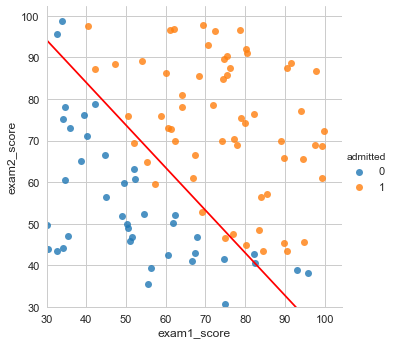

In [11]:
# Plot Boundary
# Only need 2 points to define a line, so choose two endpoints
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

# Calculate the decision boundary line
plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

sns.set_context("notebook", font_scale=1.1)
sns.set_style('whitegrid')

sns.lmplot(x='exam1_score', y='exam2_score', data=data,
           fit_reg=False, # No regression line
           hue='admitted')   # Color by evolution stage
plt.ylim(30, None)
plt.xlim(30, None)
# Plot, and adjust axes for better viewing
plt.plot(plot_x, plot_y, color='r')
plt.show()

#### 1.2.4 Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776. Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in function predict. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$.

In [12]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    P = np.zeros(m)
    
    hypothesis = (sigmoid(np.dot(X, theta.T)))
    
    P = np.where(hypothesis > 0.5, 1, 0)
    return P

After you have completed the code in predict, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [13]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


And now test the cost function. It should equal about 32.07

### 2 Regularized logistic regression
In this part of the notebook, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

First, we load the data from a CSV file:

In [14]:
ex2data2 = os.path.join(PROJ_ROOT, 'hw2', 'ex2', 'ex2data2.txt')
data2 = pd.read_csv(ex2data2, header=None, names=['test1_score', 'test2_score', 'accepted'])
print (ex2data2)
print ('Number of examples (m):', len(data))
data2.head()

/Users/sebp/LocalDocuments2/Learning/Classes/ML-Stanford/hw2/ex2/ex2data2.txt
Number of examples (m): 100


,test1_score,test2_score,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### 1.1 Visualizing the data

Once again, it is always good to visualize the data if possible before working with it. We display the data on a 2-dimensional plot.

Let's plot the data out to see what we have.

In [15]:
data2.describe()

,test1_score,test2_score,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


(-1, 1.1929832309480122)

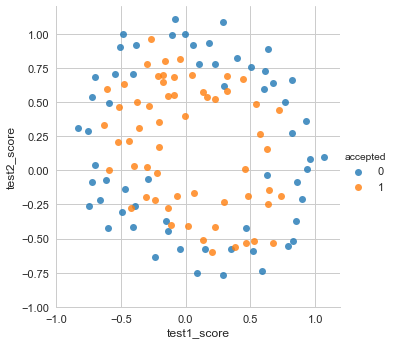

In [16]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style('whitegrid')

sns.lmplot(x='test1_score', y='test2_score', data=data2,
           fit_reg=False, # No regression line
           hue='accepted')   # Color by evolution stage
plt.ylim(-1, None)
plt.xlim(-1, None)

The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping
One way to fit the data better is to create more features from each data point. In the function mapFeature defined in the file utils.py, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 &amp; x_1 &amp; x_2 &amp; x_1^2 &amp; x_1 x_2 &amp; x_2^2 &amp; x_1^3 &amp; \dots &amp; x_1 x_2^5 &amp; x_2^6 \end{bmatrix}^T $$
As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [24]:
#  Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
data2 = np.loadtxt(os.path.join('ex2', 'ex2data2.txt'), delimiter=',')
X = data2[:, :2]
y = data2[:, 2]

# X, y = data[:, 0:2], data[:, 2]
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape
X = utils.mapFeature(X[:, 0], X[:, 1])
X

TypeError: unhashable type: 'slice'